In [108]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [110]:
df = pd.read_csv('../Course Materials/DATA/heart.csv')

In [112]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [114]:
df['target'].unique()

array([1, 0], dtype=int64)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [117]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [120]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


<Axes: xlabel='target', ylabel='count'>

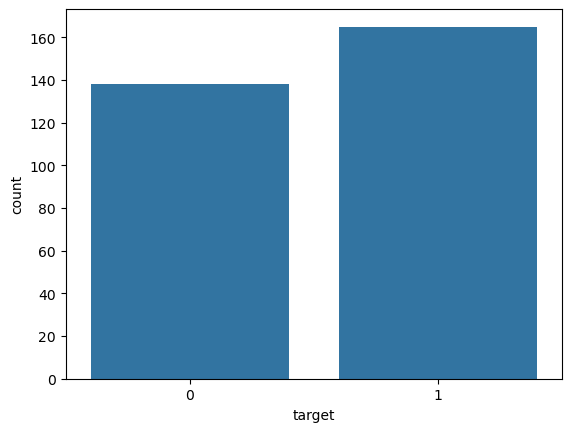

In [122]:
sns.countplot(data=df,x='target')

In [123]:
new = pd.DataFrame(data = df,columns = ['age','trestbps', 'chol','thalach','target'],index = df.index)

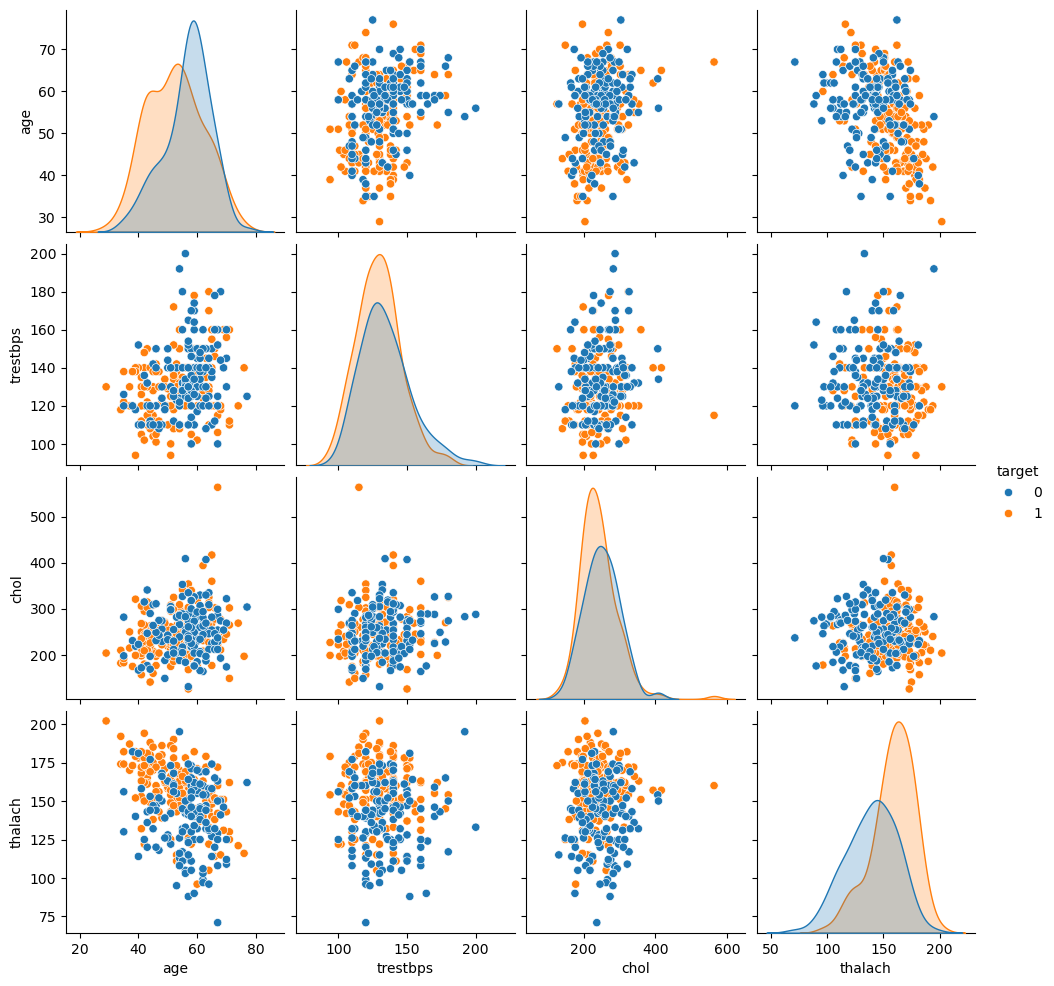

In [124]:
sns.pairplot(new,hue='target')
plt.show()

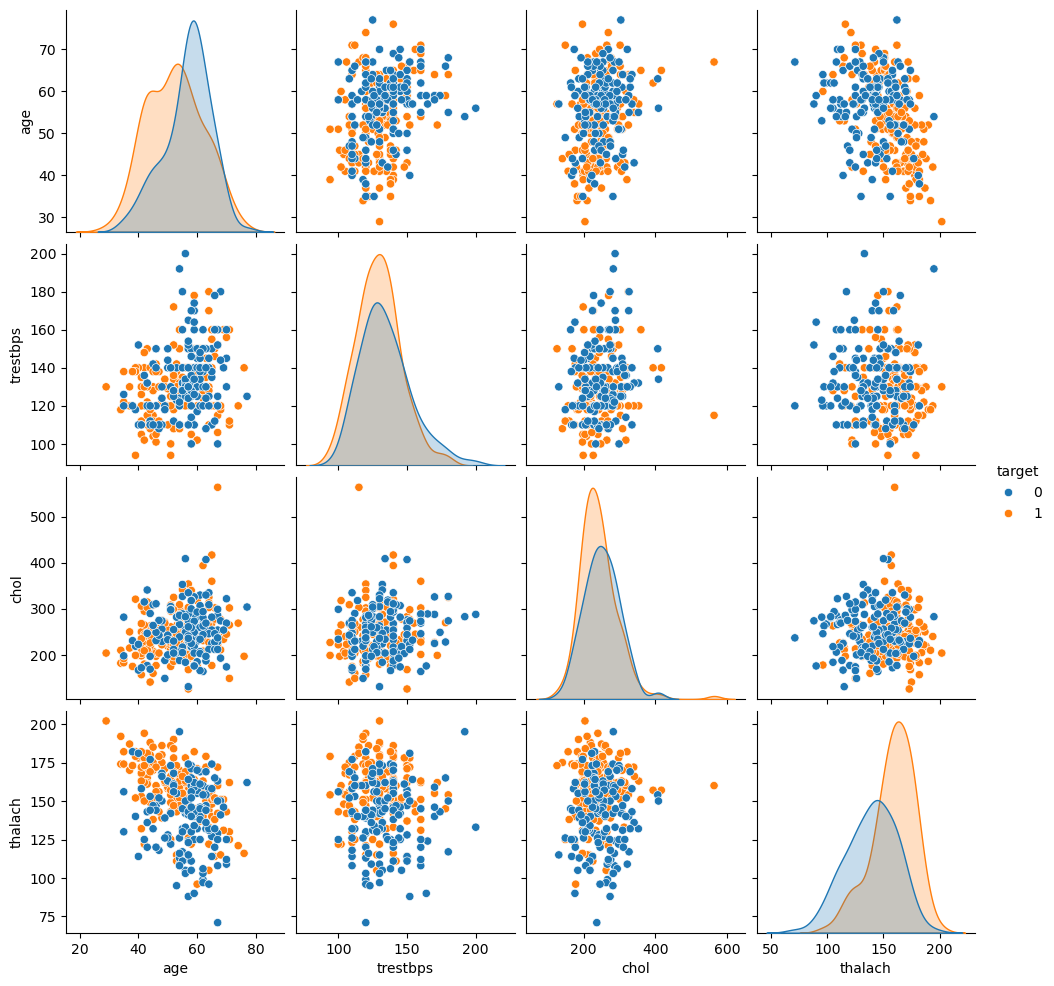

In [211]:
sns.pairplot(data = df[['age','trestbps', 'chol','thalach','target']],hue = 'target')

<Axes: >

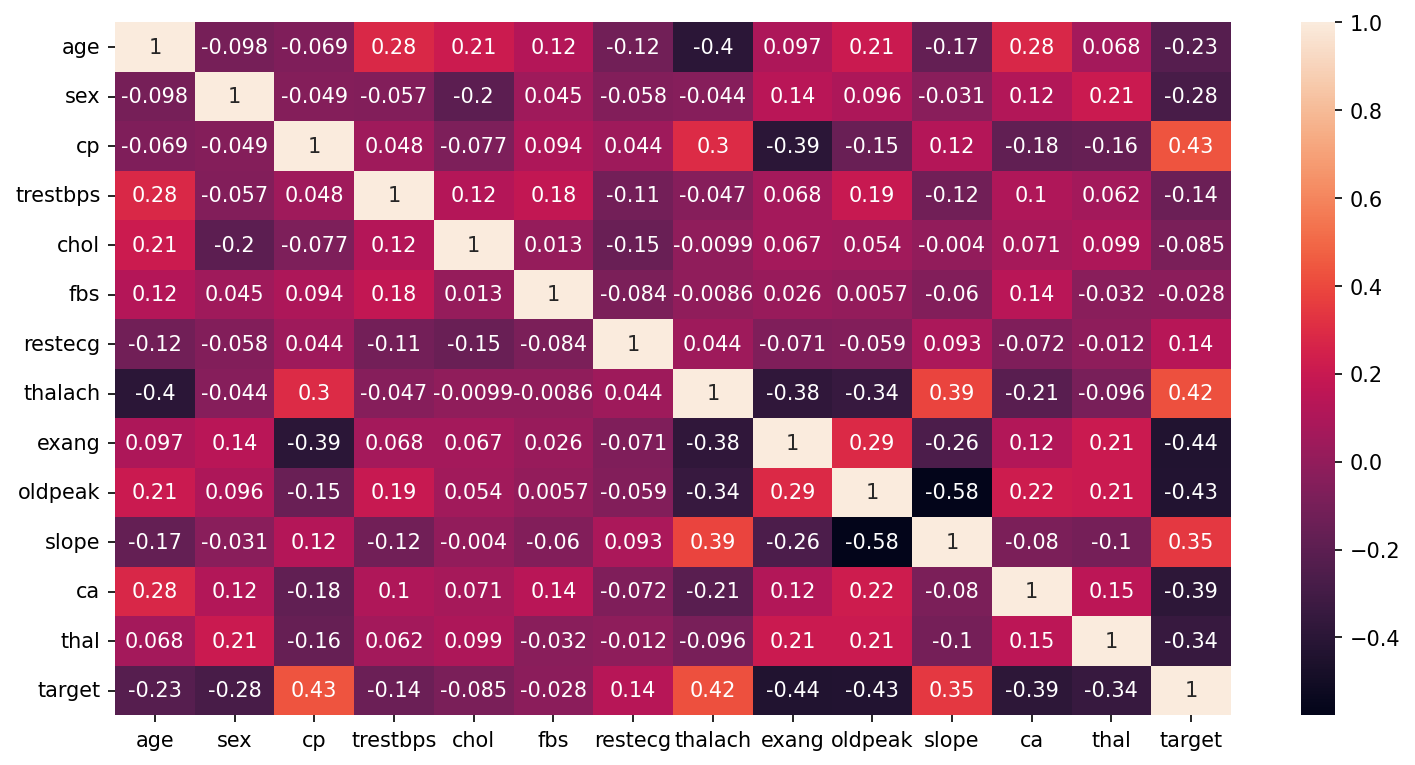

In [125]:
plt.figure(figsize=(12,6),dpi=150)
sns.heatmap(df.corr(),annot=True)

## Machine Learning

In [128]:
X = df.drop('target',axis=1)

In [130]:
y = df['target']

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [133]:
from sklearn.preprocessing import StandardScaler

In [134]:
scaler = StandardScaler()

In [135]:
scaled_X_train = scaler.fit_transform(X_train)

In [136]:
scaled_X_test = scaler.transform(X_test)

In [137]:
from sklearn.linear_model import LogisticRegression

In [138]:
model = LogisticRegression()

In [139]:
param_grid = {'C':[1.00000000e-03, 2.78255940e-03, 7.74263683e-03, 2.15443469e-02,
 5.99484250e-02, 1.66810054e-01, 4.64158883e-01, 1.29154967e+00,
 3.59381366e+00, 1.00000000e+01]}

In [140]:
from sklearn.model_selection import GridSearchCV

In [141]:
grid_model = GridSearchCV(estimator=model,param_grid=param_grid,cv=5)

In [142]:
grid_model.fit(scaled_X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.0027825594, 0.00774263683, 0.0215443469,
                               0.059948425, 0.166810054, 0.464158883,
                               1.29154967, 3.59381366, 10.0]})

In [164]:
pred = grid_model.predict(scaled_X_test)

In [166]:
pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [144]:
best_model = grid_model.best_estimator_

In [145]:
best_model

LogisticRegression(C=0.059948425)

In [146]:
grid_model.best_params_

{'C': 0.059948425}

In [147]:
print("Coefficients:", best_model.coef_)
print("Intercept:", best_model.intercept_)

Coefficients: [[-0.09508016 -0.43401832  0.58015335 -0.15206259 -0.09943428  0.02859173
   0.08565292  0.31582993 -0.3495767  -0.37595724  0.26619986 -0.54061266
  -0.40153765]]
Intercept: [0.20178408]


In [148]:
coefficients = best_model.coef_

AttributeError: 'numpy.ndarray' object has no attribute 'to_list'

In [155]:
col = df.columns

In [153]:
data = pd.DataFrame({'Features':col,'COEF':coefficients})

ValueError: Per-column arrays must each be 1-dimensional

In [94]:
sns.barplot(visual,x=df.columns,)

TypeError: Data source must be a DataFrame or Mapping, not <class 'numpy.ndarray'>.

In [90]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

## Model Performance Evaluation

In [176]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

In [168]:
cm = confusion_matrix(pred,y_test)

In [170]:
cm

array([[12,  2],
       [ 3, 14]], dtype=int64)

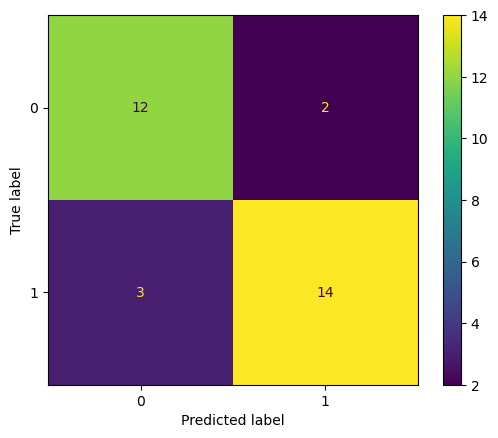

In [174]:
CM = ConfusionMatrixDisplay.from_predictions(pred,y_test)

In [178]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        14
           1       0.88      0.82      0.85        17

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



In [180]:
from sklearn.metrics import RocCurveDisplay

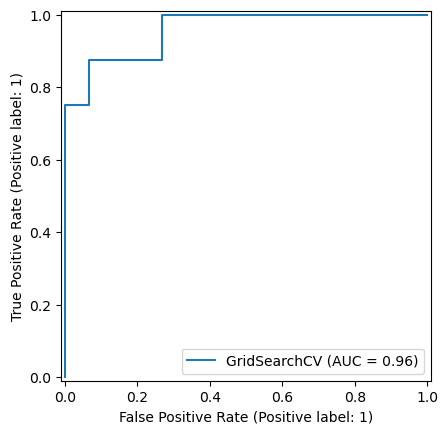

In [192]:
RocCurveDisplay.from_estimator(grid_model,scaled_X_test,y_test)

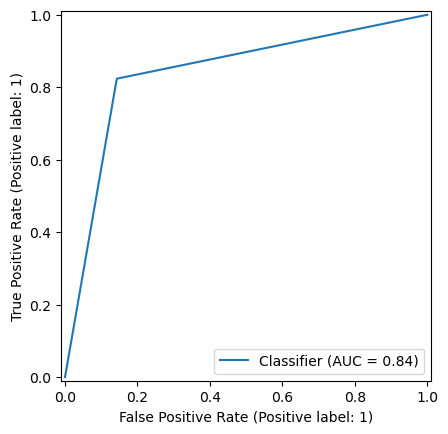

In [196]:
RocCurveDisplay.from_predictions(pred,y_test)

In [198]:
from sklearn.metrics import PrecisionRecallDisplay

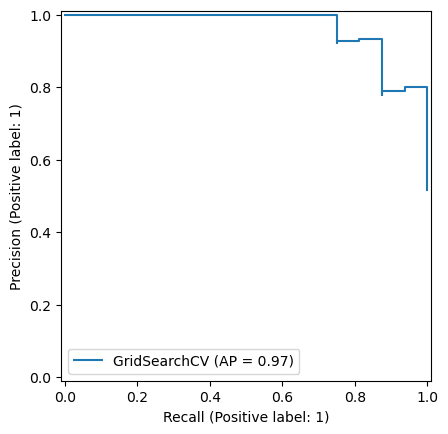

In [202]:
PrecisionRecallDisplay.from_estimator(grid_model,scaled_X_test,y_test)

In [204]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [206]:
grid_model.predict(patient)

array([0], dtype=int64)

In [208]:
grid_model.predict_proba(patient)

array([[9.99999994e-01, 6.24883771e-09]])

## The solutions addition

In [213]:
from sklearn.linear_model import LogisticRegressionCV

In [215]:
log_model = LogisticRegressionCV()

In [217]:
log_model.fit(scaled_X_train,y_train)

LogisticRegressionCV()

In [219]:
log_model.coef_

array([[-0.09624234, -0.39455733,  0.53541263, -0.13845013, -0.0882132 ,
         0.02495565,  0.08083019,  0.29896895, -0.33440044, -0.35252781,
         0.25100118, -0.49732614, -0.37440968]])

In [221]:
log_model.Cs_

array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])

In [223]:
log_model.C_

array([0.04641589])

In [225]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [235]:
coefs = pd.Series(index = X.columns,data = log_model.coef_[0])

In [237]:
log_model.coef_[0]

array([-0.09624234, -0.39455733,  0.53541263, -0.13845013, -0.0882132 ,
        0.02495565,  0.08083019,  0.29896895, -0.33440044, -0.35252781,
        0.25100118, -0.49732614, -0.37440968])

In [239]:
log_model.coef_.shape

(1, 13)

In [241]:
log_model.coef_

array([[-0.09624234, -0.39455733,  0.53541263, -0.13845013, -0.0882132 ,
         0.02495565,  0.08083019,  0.29896895, -0.33440044, -0.35252781,
         0.25100118, -0.49732614, -0.37440968]])

In [249]:
coefs

age        -0.096242
sex        -0.394557
cp          0.535413
trestbps   -0.138450
chol       -0.088213
fbs         0.024956
restecg     0.080830
thalach     0.298969
exang      -0.334400
oldpeak    -0.352528
slope       0.251001
ca         -0.497326
thal       -0.374410
dtype: float64

C:\Users\Elnar\AppData\Local\Temp\ipykernel_13040\859009359.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefs.index,y=coefs.values,palette='viridis')


<Axes: xlabel='None'>

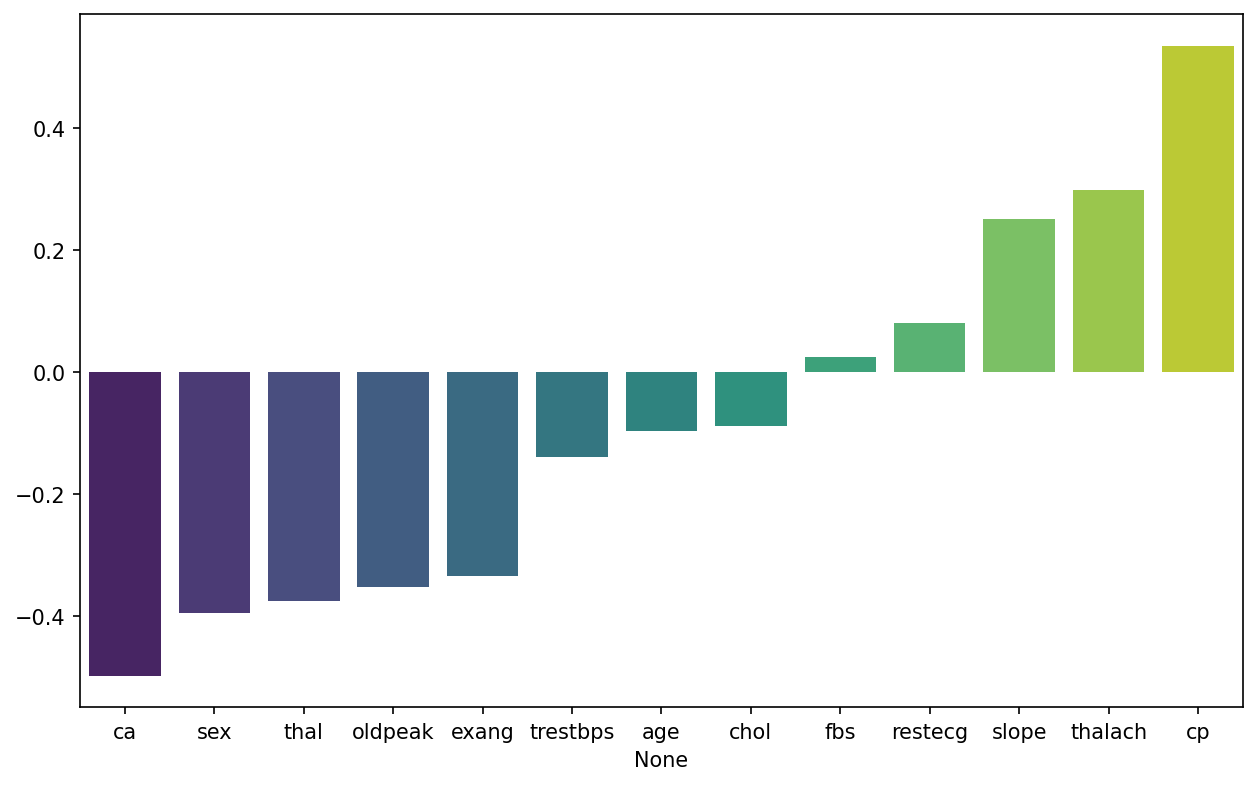

In [257]:
coefs = coefs.sort_values()
plt.figure(figsize = (10,6),dpi=150)
sns.barplot(x=coefs.index,y=coefs.values,palette='viridis')

In [259]:
y_pred = log_model.predict(scaled_X_test)

In [261]:
cm = confusion_matrix(y_pred,y_test)

In [264]:
cm

array([[12,  2],
       [ 3, 14]], dtype=int64)

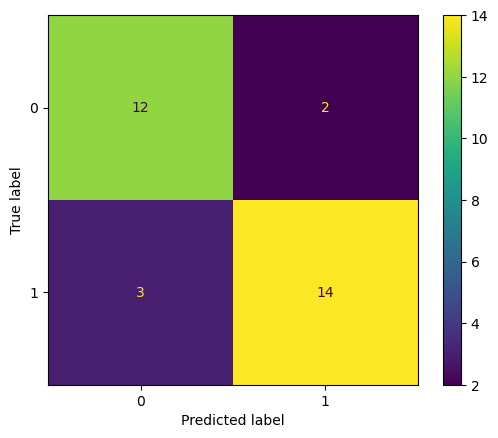

In [266]:
CM = ConfusionMatrixDisplay.from_predictions(y_pred,y_test)

In [268]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        14
           1       0.88      0.82      0.85        17

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



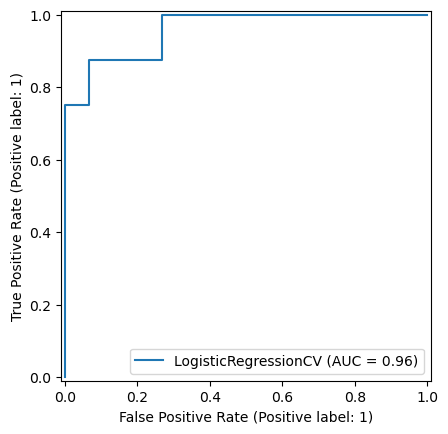

In [272]:
RocCurveDisplay.from_estimator(log_model,scaled_X_test,y_test)

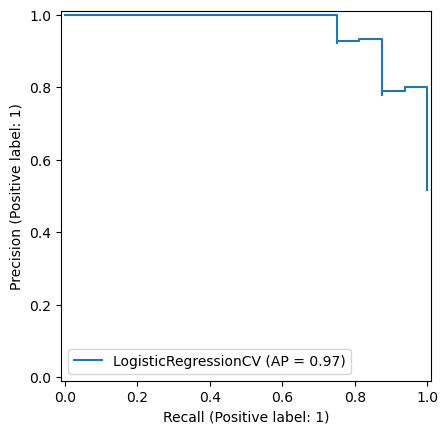

In [270]:
PrecisionRecallDisplay.from_estimator(log_model,scaled_X_test,y_test)

In [274]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [276]:
log_model.predict(patient)

array([0], dtype=int64)

In [278]:
log_model.predict_proba(patient)

array([[9.99999860e-01, 1.39946031e-07]])